# **Indepth Analysis of Box Office Films**

### **1. Project Overview**

This project focuses on conducting an in-depth analysis of the movie industry to generate actionable insights for stakeholders. The goal is to uncover trends in financial performance, audience reception, and market dynamics, helping decision-makers drive growth and maintain competitiveness.

The analysis uses data from multiple reliable sources, including:

- **Box Office Mojo** – provides detailed box office revenue data for assessing a film’s financial success.  
- **IMDB** – offers extensive information on movies and TV shows, including cast, crew, ratings, and reviews.  
- **Rotten Tomatoes** – aggregates critic and audience reviews to evaluate public and critical reception.  
- **TheMovieDB (TMDB)** – a user-driven database containing movie details, ratings, and community reviews.  
- **TheNumbers** – delivers in-depth box office statistics, budgets, and industry-level financial insights.  

Together, these sources enable a comprehensive evaluation of movie industry performance and trends.


### **2. Understanding the business problem**

  ## Defining the question

  Your company now sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. You are charged with exploring what types of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of your company's new movie studio can use to help decide what type of films to create.

##### **Problem Statement/Objective :** *Determine which types of films are currently doing the best at the box office and translate the findings into actionable insights.*

**Objectives:**
1. Identify types of films that are performing the best.
2. Explore and analyze current box office trends.
3. Identify factors that  contribute to the success of a movie.
4. Translate findings into actionable insights.

To address our objectives, we need to answer the following research questions:
1. What are the **top performing genres?**
2. What are the **preferences of the target audience?**
3. What can be done to **break market barriers?**


# 3. Data Understanding
For the analysis,we used data from the `zippedData` folder of [this repository.](https://github.com/learn-co-curriculum/dsc-phase-2-project-v3)

### Dataset Descriptions

1. **bom.movie_gross.csv**
   - **Description:** Contains financial information about movies.
   - **Columns:**
     - **Title:** The title of the film.
     - **Year of Production:** The year the movie was produced.
     - **Domestic Gross:** Total revenue generated within the domestic market.
     - **Foreign Gross:** Total revenue generated in the global market.
     - **studio** The company that produced the movie

2. **tmdb.movies.csv**
   - **Description:** Information about movies from The Movie Database (TMDb).
   - **Columns:**
     - **Genres_ids:** Identifiers for movie genres.
     - **Language:** The language in which the movie is made.
     - **Title:** The title of the movie.
     - **Popularity:** Popularity score of the movie.
     - **Average Vote Count:** Average number of votes the movie has received.

3. **rt.reviews.tsv**
   - **Description:** Contains movie reviews and ratings.
   - **Columns:**
     - **Rating:** Rating of the movie on a scale of 1-5.
     - **Publisher:** The entity that published the review.
     - **Date:** The date the review was published.

4. **rt.movie_info.tsv**
   - **Description:** Details about various movies.
   - **Columns:**
     - **Synopsis:** A brief summary of the movie’s plot.
     - **Rating:** Rating of the movie (e.g., Rotten Tomatoes score).
     - **Release Date:** The date when the movie was first shown in theaters.
     - **Box Office:** Financial data related to the movie’s box office performance.
   

5. **tn.movie_budgets.csv**
   - **Description:** Contains financial details about movies.
   - **Columns:**
     - **Budget:** The production budget of the movie.
     - **Domestic Gross:** Revenue generated in the domestic market.
     - **Worldwide Gross:** Total revenue generated worldwide.
     

6. **im.db**
- **Description:** im.db is a database that contains the tables listed below.

- **Tables:**
  - **movie_basics**
    - **Columns:**
      - **movie_id:** Unique identifier for each movie.
      - **primary_title:** The primary title of the movie.
      - **original_title:** The original title of the movie.
      - **start_year:** The year the movie was released.
      - **runtime_minutes:** The runtime of the movie in minutes.
      - **genres:** Genres associated with the movie.


  - **movie_ratings**
    - **Columns:**
      - **movie_id:** Unique identifier for the movie.
      - **averagerating:** Average rating of the movie.
      - **numvotes:** Number of votes the movie received.




**Properties of Variables of interest:**

1. ***Movie Name:*** Categorical variable which is a textual label or name of the movie.
2. ***Genre:*** Categorical variable representing the type or category of the movie (e.g., Action, Drama, Comedy).
3. ***Budget:*** Continuous variable representing the production cost or budget of the movie.
4. ***Worldwide Gross:*** Continuous variable representing the total revenue generated by the movie at the box office.
5. ***User Rating:*** Continuous variable representing the average ratings or scores given by users for the movie.
6. ***Release Date:*** Temporal variable indicating the date when the movie was released in theaters.




# **Data Preparation**

In [84]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

from scipy import stats
from scipy.stats import ttest_ind, ttest_1samp, chi2_contingency, norm

import statsmodels.api as sm
import statsmodels.formula.api as smf

# Reading the data

In [85]:
tmdb_movies = pd.read_csv('./Data/tmdb.movies.csv')
movie_budgets = pd.read_csv('./Data/tn.movie_budgets.csv')
movie_gross = pd.read_csv('./Data/bom.movie_gross.csv')

In [86]:
conn = sqlite3.connect('./Data/im.db')
pd.read_sql("SELECT name FROM sqlite_master WHERE type='table';", conn)

,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


In [87]:
movie_basics = pd.read_sql("SELECT * FROM movie_basics;", conn)
movie_ratings = pd.read_sql("SELECT * FROM movie_ratings;", conn)

# Data exploration and cleaning

## Cleaning the tmdb_movies dataset

### Steps

1. **Check for duplicates and null values**  

2. **Drop unnamed column**  

3. **Converting `release_date` to datetime format**  

4. **Extract `year` from `release_date`**  

5. **Dropping duplicate records**  



In [88]:
tmdb_movies.head()


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [89]:
tmdb_movies.duplicated().sum()

0

In [90]:
tmdb_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [91]:
tmdb_movies.isna().sum()

Unnamed: 0           0
genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

In [92]:
tmdb_movies['release_date'] = pd.to_datetime(tmdb_movies['release_date'], errors='coerce')


In [93]:
tmdb_movies['release_year'] = tmdb_movies['release_date'].dt.year

In [94]:
tmdb_movies.drop(columns=['Unnamed: 0'], inplace=True)

In [95]:
tmdb_movies.duplicated().sum()

1020

In [96]:
tmdb_movies.drop_duplicates(inplace=True)

In [97]:
tmdb_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25497 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   genre_ids          25497 non-null  object        
 1   id                 25497 non-null  int64         
 2   original_language  25497 non-null  object        
 3   original_title     25497 non-null  object        
 4   popularity         25497 non-null  float64       
 5   release_date       25497 non-null  datetime64[ns]
 6   title              25497 non-null  object        
 7   vote_average       25497 non-null  float64       
 8   vote_count         25497 non-null  int64         
 9   release_year       25497 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(4)
memory usage: 2.1+ MB


In [98]:
tmdb_movies.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,release_year
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,2010
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,2010
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,2010
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,1995
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,2010


# Cleaning the tn_movie_budgets Dataset

In [99]:
movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [100]:
movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [101]:
movie_budgets['release_date'] = pd.to_datetime(movie_budgets['release_date'], errors='coerce')

In [102]:
#remove the $ sign and commas from the budget and revenue columns
movie_budgets['production_budget'] = movie_budgets['production_budget'].replace('[\$,]', '', regex=True).astype(float)
movie_budgets['domestic_gross'] = movie_budgets['domestic_gross'].replace('[\$,]', '', regex=True).astype(float)
movie_budgets['worldwide_gross'] = movie_budgets['worldwide_gross'].replace('[\$,]', '', regex=True).astype(float)  

In [103]:
# change production_budget, domestic_gross, worldwide_gross to numeric types
movie_budgets['production_budget'] = pd.to_numeric(movie_budgets['production_budget'], errors='coerce')
movie_budgets['domestic_gross'] = pd.to_numeric(movie_budgets['domestic_gross'], errors='coerce')
movie_budgets['worldwide_gross'] = pd.to_numeric(movie_budgets['worldwide_gross'], errors='coerce') 

In [104]:
# Profit ratio for The Numbers data
movie_budgets['profit_ratio'] = movie_budgets['worldwide_gross'] / movie_budgets['production_budget']
movie_budgets['profit_ratio'].replace([np.inf, -np.inf], np.nan, inplace=True)

# Cap extreme outliers (values above 20 are rare in film data)
movie_budgets['profit_ratio'] = movie_budgets['profit_ratio'].clip(upper=20)

In [105]:
movie_budgets.isna().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
profit_ratio         0
dtype: int64

In [106]:
movie_budgets.duplicated().sum()

0

In [107]:
# profitd = worldwide gross - production_budget
movie_budgets['profit'] = movie_budgets['worldwide_gross'] - movie_budgets['production_budget']

In [108]:
# extract year from release_date
movie_budgets['year'] = movie_budgets['release_date'].dt.year

In [109]:
movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 5782 non-null   int64         
 1   release_date       5782 non-null   datetime64[ns]
 2   movie              5782 non-null   object        
 3   production_budget  5782 non-null   float64       
 4   domestic_gross     5782 non-null   float64       
 5   worldwide_gross    5782 non-null   float64       
 6   profit_ratio       5782 non-null   float64       
 7   profit             5782 non-null   float64       
 8   year               5782 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(2), object(1)
memory usage: 406.7+ KB


In [110]:
movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_ratio,profit,year
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,6.532577,2.351345e+09,2009
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,2.546673,6.350639e+08,2011
2,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,0.427892,-2.002376e+08,2019
3,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,4.243841,1.072414e+09,2015
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,4.153696,9.997217e+08,2017


# Cleaning the bom.movie_gross.csv

In [111]:
movie_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [112]:
movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [113]:
movie_gross.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [114]:
movie_gross['foreign_gross'] = pd.to_numeric(movie_gross['foreign_gross'].replace('[\$,]', '', regex=True), errors='coerce')

In [115]:
# year to datetime
movie_gross['year'] = pd.to_datetime(movie_gross['year'], format='%Y', errors='coerce')

In [116]:
movie_gross['year'] = movie_gross['year'].dt.strftime('%Y')

In [117]:
movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   float64
 4   year            3387 non-null   object 
dtypes: float64(2), object(3)
memory usage: 132.4+ KB


In [118]:
movie_gross['studio'].fillna('Unknown', inplace=True)

In [119]:
# fill foreign_gross with median
movie_gross['foreign_gross'].fillna(movie_gross['foreign_gross'].median(), inplace=True)
median = movie_gross['foreign_gross'].median()
median

18700000.0

In [120]:
#drop null in foreign_gross
movie_gross.dropna(subset=['domestic_gross'], inplace=True)

In [121]:
movie_gross.isna().sum()

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

In [122]:
#add total_gross column
movie_gross['total_gross'] = movie_gross['domestic_gross'] + movie_gross['foreign_gross']

In [123]:
movie_gross.head()

,title,studio,domestic_gross,foreign_gross,year,total_gross
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,9.603000e+08
3,Inception,WB,292600000.0,535700000.0,2010,8.283000e+08
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08


In [124]:
movie_gross.duplicated().sum()

0

# Working with im.db

In [125]:
#combining movie_basics and movie_ratings
movie_basics_ratings = pd.read_sql('''SELECT *
               FROM movie_basics 
               JOIN movie_ratings 
               USING(movie_id);
            ''', conn)
movie_basics_ratings.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


In [126]:
movie_basics_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   start_year       73856 non-null  int64  
 4   runtime_minutes  66236 non-null  float64
 5   genres           73052 non-null  object 
 6   averagerating    73856 non-null  float64
 7   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 4.5+ MB


In [127]:
movie_basics_ratings.isna().sum() 

movie_id              0
primary_title         0
original_title        0
start_year            0
runtime_minutes    7620
genres              804
averagerating         0
numvotes              0
dtype: int64

In [128]:
movie_basics_ratings.drop(columns=['runtime_minutes'], inplace=True)

In [129]:
movie_basics_ratings['genres'].fillna('Unknown', inplace=True)

In [130]:
movie_basics_ratings.isna().sum()

movie_id          0
primary_title     0
original_title    0
start_year        0
genres            0
averagerating     0
numvotes          0
dtype: int64

In [131]:
movie_basics_ratings.duplicated().sum()

0

# Movie_budgets + movie_gross

In [132]:
df_box = pd.merge(movie_budgets, movie_gross,
                  left_on='movie',
                  right_on='title',
                  how='inner')

df_box.head(3)

,id,release_date,movie,production_budget,domestic_gross_x,worldwide_gross,profit_ratio,profit,year_x,title,studio,domestic_gross_y,foreign_gross,year_y,total_gross
0,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,2.546673,6.350639e+08,2011,Pirates of the Caribbean: On Stranger Tides,BV,241100000.0,804600000.0,2011,1.045700e+09
1,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,4.243841,1.072414e+09,2015,Avengers: Age of Ultron,BV,459000000.0,946400000.0,2015,1.405400e+09
2,7,2018-04-27,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,6.827114,1.748134e+09,2018,Avengers: Infinity War,BV,678800000.0,1369.5,2018,6.788014e+08


In [133]:
df_box.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1245 entries, 0 to 1244
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 1245 non-null   int64         
 1   release_date       1245 non-null   datetime64[ns]
 2   movie              1245 non-null   object        
 3   production_budget  1245 non-null   float64       
 4   domestic_gross_x   1245 non-null   float64       
 5   worldwide_gross    1245 non-null   float64       
 6   profit_ratio       1245 non-null   float64       
 7   profit             1245 non-null   float64       
 8   year_x             1245 non-null   int64         
 9   title              1245 non-null   object        
 10  studio             1245 non-null   object        
 11  domestic_gross_y   1245 non-null   float64       
 12  foreign_gross      1245 non-null   float64       
 13  year_y             1245 non-null   object        
 14  total_gr

In [134]:
df_box.isna().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross_x     0
worldwide_gross      0
profit_ratio         0
profit               0
year_x               0
title                0
studio               0
domestic_gross_y     0
foreign_gross        0
year_y               0
total_gross          0
dtype: int64

# movie_basics_ratings + movie_budgets

In [135]:
# merging the  datasets
combined_data_with_budget = pd.merge(movie_basics_ratings, movie_budgets, how="inner", left_on="primary_title", right_on="movie")
combined_data_with_budget.head()

,movie_id,primary_title,original_title,start_year,genres,averagerating,numvotes,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_ratio,profit,year
0,tt0249516,Foodfight!,Foodfight!,2012,"Action,Animation,Comedy",1.9,8248,26,2012-12-31,Foodfight!,45000000.0,0.0,73706.0,0.001638,-44926294.0,2012
1,tt0326592,The Overnight,The Overnight,2010,Unknown,7.5,24,21,2015-06-19,The Overnight,200000.0,1109808.0,1165996.0,5.829980,965996.0,2015
2,tt3844362,The Overnight,The Overnight,2015,"Comedy,Mystery",6.1,14828,21,2015-06-19,The Overnight,200000.0,1109808.0,1165996.0,5.829980,965996.0,2015
3,tt0337692,On the Road,On the Road,2012,"Adventure,Drama,Romance",6.1,37886,17,2013-03-22,On the Road,25000000.0,720828.0,9313302.0,0.372532,-15686698.0,2013
4,tt4339118,On the Road,On the Road,2014,Drama,6.0,6,17,2013-03-22,On the Road,25000000.0,720828.0,9313302.0,0.372532,-15686698.0,2013


In [136]:
combined_data_with_budget.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2875 entries, 0 to 2874
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   movie_id           2875 non-null   object        
 1   primary_title      2875 non-null   object        
 2   original_title     2875 non-null   object        
 3   start_year         2875 non-null   int64         
 4   genres             2875 non-null   object        
 5   averagerating      2875 non-null   float64       
 6   numvotes           2875 non-null   int64         
 7   id                 2875 non-null   int64         
 8   release_date       2875 non-null   datetime64[ns]
 9   movie              2875 non-null   object        
 10  production_budget  2875 non-null   float64       
 11  domestic_gross     2875 non-null   float64       
 12  worldwide_gross    2875 non-null   float64       
 13  profit_ratio       2875 non-null   float64       
 14  profit  

In [137]:
# check for duplicate records. in this case, rows are considered duplicates if the values in these columns are the same.
duplicates = combined_data_with_budget[combined_data_with_budget.duplicated(subset=['release_date', 
                                                                              'movie',
                                                                              'domestic_gross',
                                                                              'production_budget',
                                                                              'worldwide_gross'])]
duplicates

,movie_id,primary_title,original_title,start_year,genres,averagerating,numvotes,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_ratio,profit,year
2,tt3844362,The Overnight,The Overnight,2015,"Comedy,Mystery",6.1,14828,21,2015-06-19,The Overnight,200000.0,1109808.0,1165996.0,5.829980,965996.0,2015
4,tt4339118,On the Road,On the Road,2014,Drama,6.0,6,17,2013-03-22,On the Road,25000000.0,720828.0,9313302.0,0.372532,-15686698.0,2013
5,tt5647250,On the Road,On the Road,2016,Drama,5.7,127,17,2013-03-22,On the Road,25000000.0,720828.0,9313302.0,0.372532,-15686698.0,2013
24,tt4453750,Before We Go,Before We Go,2014,"Documentary,Drama,News",7.0,22,52,2015-09-04,Before We Go,3000000.0,37151.0,483938.0,0.161313,-2516062.0,2015
29,tt4028068,Wonder Woman,Wonder Woman,2014,Sci-Fi,4.2,20,55,2017-06-02,Wonder Woman,150000000.0,412563408.0,821133378.0,5.474223,671133378.0,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2774,tt6305342,Nomad,Göçebe,2017,Drama,6.3,68,37,2007-03-16,Nomad,40000000.0,79123.0,79123.0,0.001978,-39920877.0,2007
2787,tt6852284,Venus,Venus,2017,"Comedy,Drama,Family",5.9,161,62,2006-12-21,Venus,6000000.0,3347411.0,7818479.0,1.303080,1818479.0,2006
2801,tt6644200,A Quiet Place,A Quiet Place,2018,"Drama,Horror,Sci-Fi",7.6,305031,66,2018-04-06,A Quiet Place,17000000.0,188024361.0,334522294.0,19.677782,317522294.0,2018
2814,tt6739824,Upgrade,Upgrade,2016,Drama,8.8,69,89,2018-06-01,Upgrade,3000000.0,11977130.0,16553285.0,5.517762,13553285.0,2018


In [138]:
# Drop duplicates and keep first occurrence
combined_data_with_budget = combined_data_with_budget.drop_duplicates(subset=['release_date', 
                                                                              'movie',
                                                                              'domestic_gross',
                                                                              'production_budget',
                                                                              'worldwide_gross'], keep='first')

# confirm duplicates have been dropped.
combined_data_with_budget.duplicated().sum()

0

In [139]:
# We noticed from data exploration that the genre col had a few missing values . So drop missing values
combined_data_with_budget.dropna(inplace= True)

In [140]:
combined_data_with_budget.head()

,movie_id,primary_title,original_title,start_year,genres,averagerating,numvotes,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_ratio,profit,year
0,tt0249516,Foodfight!,Foodfight!,2012,"Action,Animation,Comedy",1.9,8248,26,2012-12-31,Foodfight!,45000000.0,0.0,73706.0,0.001638,-44926294.0,2012
1,tt0326592,The Overnight,The Overnight,2010,Unknown,7.5,24,21,2015-06-19,The Overnight,200000.0,1109808.0,1165996.0,5.829980,965996.0,2015
3,tt0337692,On the Road,On the Road,2012,"Adventure,Drama,Romance",6.1,37886,17,2013-03-22,On the Road,25000000.0,720828.0,9313302.0,0.372532,-15686698.0,2013
6,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,"Adventure,Comedy,Drama",7.3,275300,37,2013-12-25,The Secret Life of Walter Mitty,91000000.0,58236838.0,187861183.0,2.064409,96861183.0,2013
7,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,"Action,Crime,Drama",6.5,105116,67,2014-09-19,A Walk Among the Tombstones,28000000.0,26017685.0,62108587.0,2.218164,34108587.0,2014


In [141]:
# Top grossing movies
top_movies = movie_gross.sort_values('total_gross', ascending=False).head(5)
print(top_movies[['title', 'studio', 'total_gross']])
 
print('--------------------------------------------------------------------------------')
# Total gross per studio
studio_gross = movie_gross.groupby('studio')['total_gross'].sum().sort_values(ascending=False)
print(studio_gross)


                                            title studio   total_gross
727                         Marvel's The Avengers     BV  1.518900e+09
1875                      Avengers: Age of Ultron     BV  1.405400e+09
3080                                Black Panther     BV  1.347000e+09
328   Harry Potter and the Deathly Hallows Part 2     WB  1.341500e+09
2758                     Star Wars: The Last Jedi     BV  1.332600e+09
--------------------------------------------------------------------------------
studio
BV              4.425028e+10
Fox             3.104277e+10
WB              3.102295e+10
Uni.            2.981326e+10
Sony            2.247972e+10
                    ...     
FOAK            1.243000e+05
IVP             1.121000e+05
Darin Southa    9.840000e+04
ITL             5.290000e+04
WOW             4.940000e+04
Name: total_gross, Length: 256, dtype: float64


In [142]:
import re

def normalize_title(title):
    if pd.isna(title):
        return ''
    t = str(title).lower()
    t = re.sub(r'\(.*?\)', '', t)     # remove text in parentheses
    t = re.sub(r'[^a-z0-9\s]', '', t) # remove punctuation
    t = re.sub(r'\s+', ' ', t).strip()
    return t

# Apply normalization across datasets
movie_basics['title_norm'] = movie_basics['primary_title'].apply(normalize_title)
movie_gross['title_norm'] = movie_gross['title'].apply(normalize_title)
tmdb_movies['title_norm'] = tmdb_movies['title'].apply(normalize_title)
movie_budgets['title_norm'] = movie_budgets['movie'].apply(normalize_title)


# Visualizations

# Profit Ratio Distribution

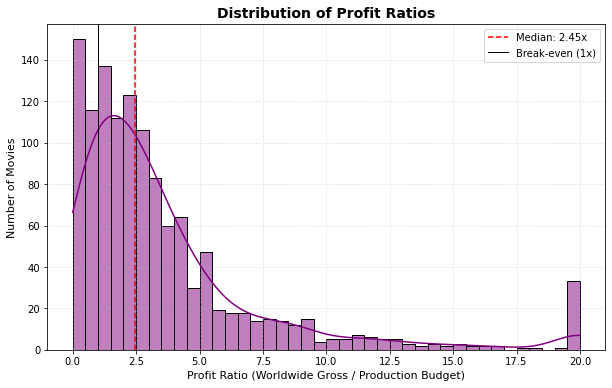

In [143]:
plt.figure(figsize=(10, 6))
sns.histplot(df_box['profit_ratio'], bins=40, kde=True, color='purple')
plt.title('Distribution of Profit Ratios', fontsize=14, fontweight='bold')
plt.xlabel('Profit Ratio (Worldwide Gross / Production Budget)', fontsize=11)
plt.ylabel('Number of Movies', fontsize=11)
plt.axvline(df_box['profit_ratio'].median(), color='red', linestyle='--', 
            label=f'Median: {df_box["profit_ratio"].median():.2f}x')
plt.axvline(1, color='black', linestyle='-', linewidth=1, label='Break-even (1x)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()


# Top 10 Studios by Average profit

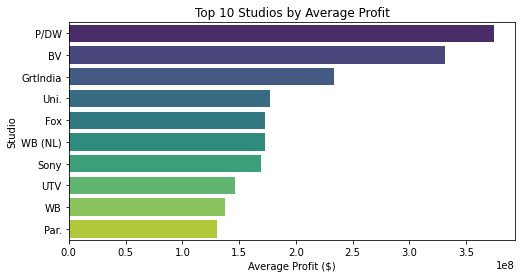

In [144]:
# compute total profit
df_box['profit'] = df_box['worldwide_gross'] - df_box['production_budget']

top_studios = df_box.groupby('studio')['profit'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(8,4))
sns.barplot(x=top_studios.values, y=top_studios.index, palette='viridis')

plt.title('Top 10 Studios by Average Profit')
plt.xlabel('Average Profit ($)')
plt.ylabel('Studio')
plt.show()


# Profit Distribution across top 5 studios

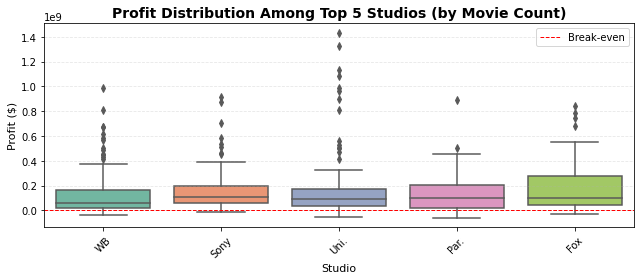

In [145]:
# Select top 5 studios by movie count
top5_studios = df_box['studio'].value_counts().head(5).index

plt.figure(figsize=(9, 4))
sns.boxplot(x='studio', y='profit', data=df_box[df_box['studio'].isin(top5_studios)], palette='Set2')
plt.title('Profit Distribution Among Top 5 Studios (by Movie Count)', fontsize=14, fontweight='bold')
plt.xlabel('Studio', fontsize=11)
plt.ylabel('Profit ($)', fontsize=11)
plt.xticks(rotation=45)
plt.axhline(0, color='red', linestyle='--', linewidth=1, label='Break-even')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

# Distribution of genres in our dataset

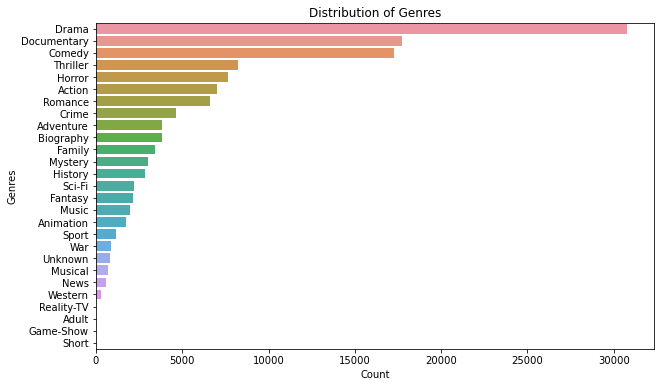

In [146]:
# Distribution of genres
plt.figure(figsize=(10, 6))
movie_basics_and_rating_exploded = movie_basics_ratings['genres'].str.split(',').explode()
sns.countplot(y=movie_basics_and_rating_exploded, order=movie_basics_and_rating_exploded.value_counts().index)
plt.title('Distribution of Genres')
plt.xlabel('Count')
plt.ylabel('Genres')
plt.show()

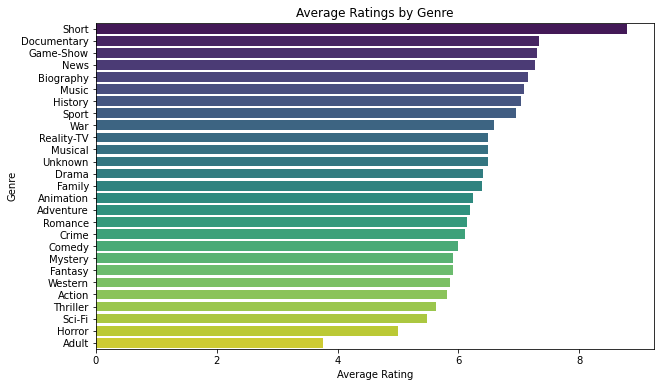

In [147]:
# Exploding genres to handle multiple genres per movie
movie_basics_ratings_exploded = movie_basics_ratings.assign(genres=movie_basics_ratings['genres'].str.split(',')).explode('genres')

# Calculating the average rating for each genre
genre_avg_rating = movie_basics_ratings_exploded.groupby('genres')['averagerating'].mean().reset_index().sort_values(by = 'averagerating', ascending=False)


# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='averagerating', y='genres', data=genre_avg_rating, palette='viridis')
plt.title('Average Ratings by Genre')
plt.xlabel('Average Rating')
plt.ylabel('Genre')
plt.show()

# top genres by average rating

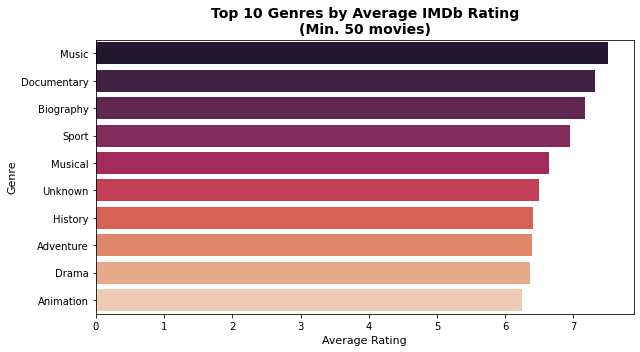

In [148]:
# Extract primary genre (first genre listed)
movie_basics_ratings['primary_genre'] = movie_basics_ratings['genres'].apply(lambda x: x.split(',')[0] if pd.notna(x) else 'Unknown')

# Filter genres with at least 50 movies
genre_counts = movie_basics_ratings['primary_genre'].value_counts()
valid_genres = genre_counts[genre_counts >= 50].index

genre_ratings = movie_basics_ratings[movie_basics_ratings['primary_genre'].isin(valid_genres)].groupby('primary_genre')['averagerating'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(9, 5))
sns.barplot(x=genre_ratings.values, y=genre_ratings.index, palette='rocket')
plt.title('Top 10 Genres by Average IMDb Rating\n(Min. 50 movies)', fontsize=14, fontweight='bold')
plt.xlabel('Average Rating', fontsize=11)
plt.ylabel('Genre', fontsize=11)
plt.tight_layout()
plt.show()

# What movies have been the most successful financially?
To answer this question, we look at the box office gross earnings and profits of various movies.

In [149]:
# check the top perfoming movies
top_20_movies_world=movie_budgets.nlargest (n=20, columns='worldwide_gross')
top_20_movies_domestic = movie_budgets.nlargest(n=20, columns ='domestic_gross')

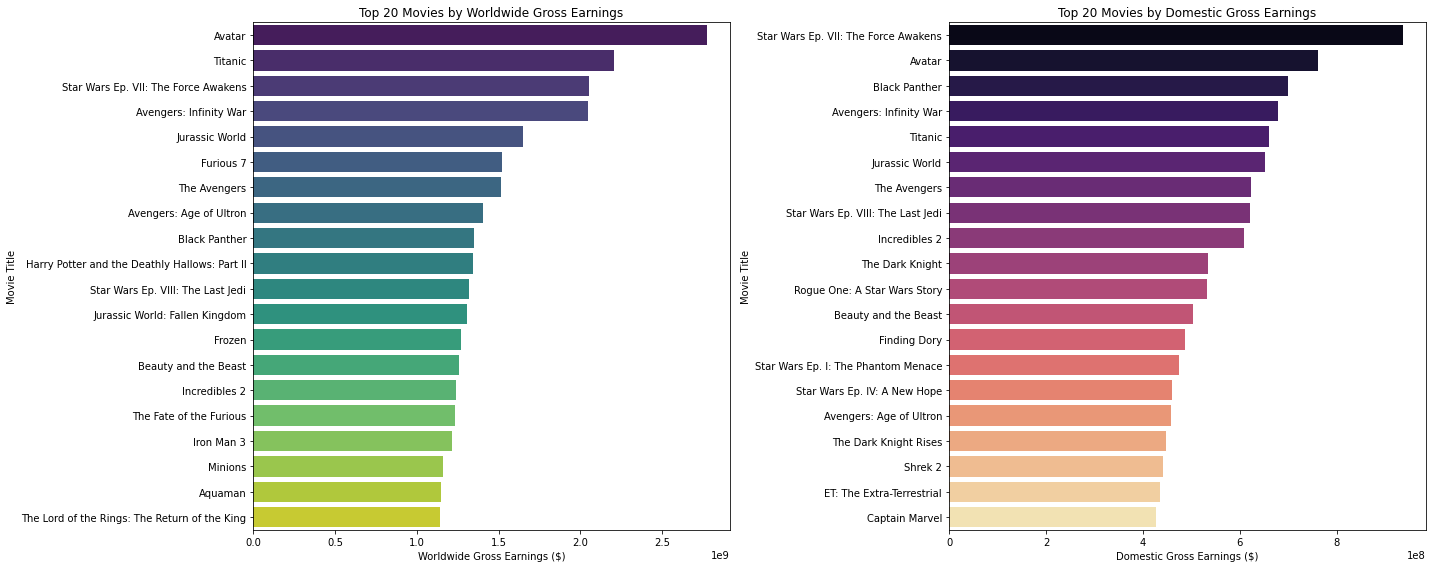

In [150]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Plot for worldwide gross earnings
sns.barplot(x='worldwide_gross', y='movie', data=top_20_movies_world, ax=axes[0], palette='viridis')
axes[0].set_xlabel('Worldwide Gross Earnings ($)')
axes[0].set_ylabel('Movie Title')
axes[0].set_title('Top 20 Movies by Worldwide Gross Earnings')

# Plot for domestic gross earnings
sns.barplot(x='domestic_gross', y='movie', data=top_20_movies_domestic, ax=axes[1], palette='magma')
axes[1].set_xlabel('Domestic Gross Earnings ($)')
axes[1].set_ylabel('Movie Title')
axes[1].set_title('Top 20 Movies by Domestic Gross Earnings')

# Adjust layout
plt.tight_layout()

# plt.savefig('top_20_movies_by_gross.png', dpi=300, bbox_inches='tight')

# Show the plots
plt.show()

The movie with the highest revenue at approximately $2.8 million is Avatar.

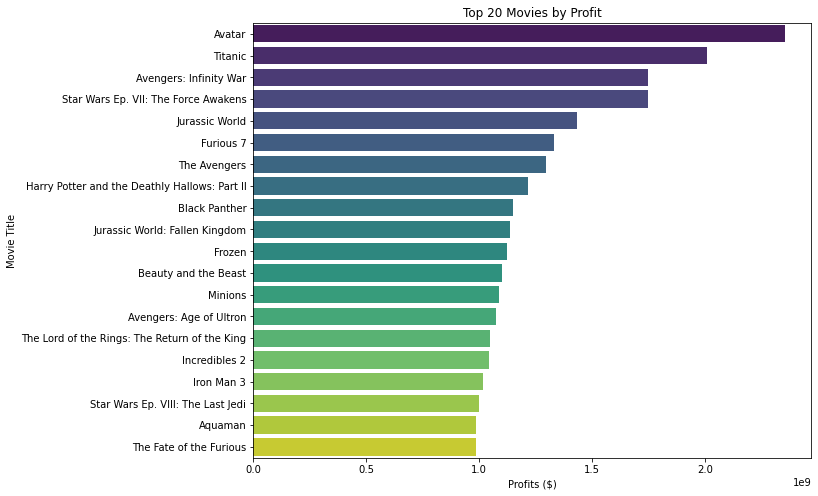

In [151]:
fig , ax = plt.subplots(figsize = (10,8))
# get the top 20 profitable movies
top_profitable = movie_budgets.nlargest(n = 20, columns= 'profit')

sns.barplot(x='profit', y='movie', data=top_profitable, ax=ax, palette='viridis')

# Set axis labels and title
ax.set_xlabel('Profits ($)')
ax.set_ylabel('Movie Title')
plt.title('Top 20 Movies by Profit')

# plt.savefig('top_20_movies_by_profit.png', dpi=300, bbox_inches='tight')
# Show the plot
plt.show()

### Analysing the relationship between `domestic_gross`, `worlwide_gross` and `profit`   

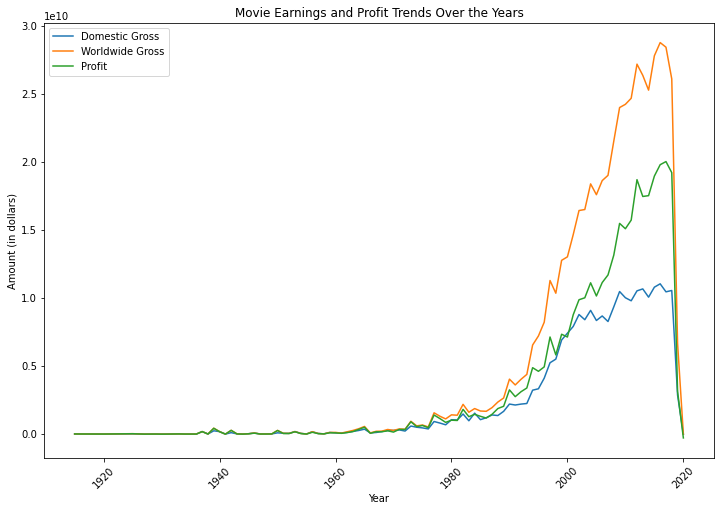

In [152]:
# plot movie earnings trends over the years and profits
# Aggregate data by year
yearly_data = movie_budgets.groupby('year').agg({
    'domestic_gross': 'sum',
    'worldwide_gross': 'sum',
    'profit': 'sum'
}).reset_index()

# Plot the trends
fig, ax = plt.subplots(figsize=(12, 8))

sns.lineplot(data=yearly_data, x='year', y='domestic_gross', label='Domestic Gross', ax=ax)
sns.lineplot(data=yearly_data, x='year', y='worldwide_gross', label='Worldwide Gross', ax=ax)
sns.lineplot(data=yearly_data, x='year', y='profit', label='Profit', ax=ax)

ax.set_xlabel('Year')
ax.set_ylabel('Amount (in dollars)')
ax.set_title('Movie Earnings and Profit Trends Over the Years')
plt.xticks(rotation=45)
plt.legend()

plt.show()

Over time, we notice `domestic_gross`, `worldwide_gross` and `profit` have been generally increasing. 

To further understand `worldwide_gross`by month, we plot the average and total gross revenue by month. 

In [153]:
# get a list of months extracted

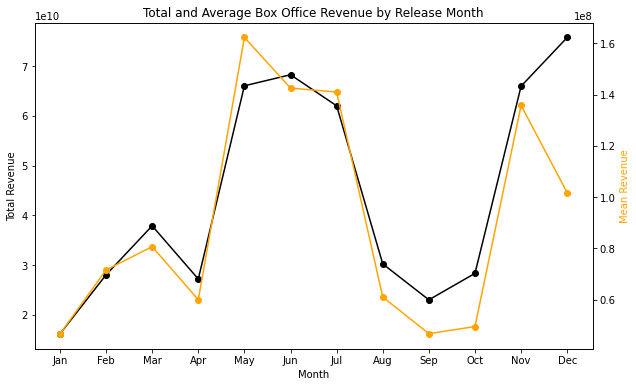

In [154]:
# Extract month number
movie_budgets['month'] = movie_budgets['release_date'].dt.month

# Now group by month and calculate total & average revenue
monthly_revenue = movie_budgets.groupby('month')['worldwide_gross'].agg(['sum', 'mean']).reset_index()

# Plot
fig, ax1 = plt.subplots(figsize=(10,6))

ax1.set_xlabel('Month')
ax1.set_ylabel('Total Revenue', color="black")
ax1.plot(monthly_revenue['month'], monthly_revenue['sum'], color="black", marker='o', label='Total Revenue')

ax2 = ax1.twinx()
ax2.set_ylabel('Mean Revenue', color="orange")
ax2.plot(monthly_revenue['month'], monthly_revenue['mean'], color="orange", marker='o', label='Mean Revenue')

plt.title('Total and Average Box Office Revenue by Release Month')
plt.xticks(monthly_revenue['month'], ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()


From the above graph, we notice that while May, November and December have the highest revenues, on average, May, June and July are the highest performing.

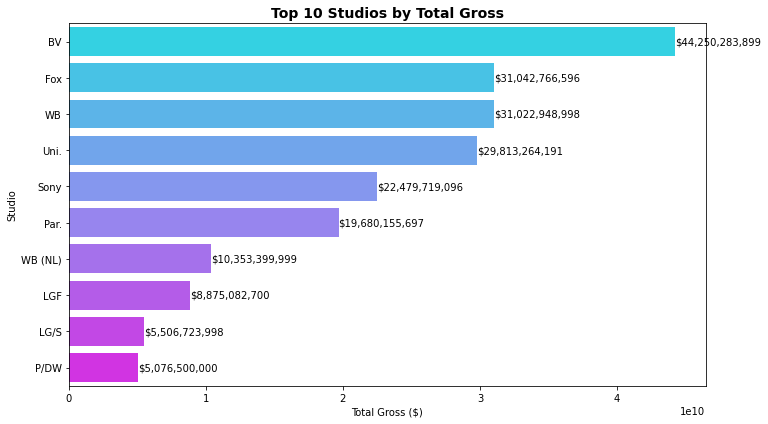

In [155]:
# total gross per studio
movie_gross['total_gross'] = movie_gross['domestic_gross'] + movie_gross['foreign_gross']

studio_gross = (
    movie_gross.groupby('studio')['total_gross']
       .sum()
       .sort_values(ascending=False)
       .head(10)
       .reset_index()
)

# Plot total gross for top 10 studios
plt.figure(figsize=(10,6))
sns.barplot(data=studio_gross, x='total_gross', y='studio', palette='cool')
plt.title('Top 10 Studios by Total Gross', fontsize=14, weight='bold')
plt.xlabel('Total Gross ($)')
plt.ylabel('Studio')
plt.tight_layout()

for i, v in enumerate(studio_gross['total_gross']):
    plt.text(v, i, f'${v:,.0f}', va='center', fontsize=10)

plt.show()


' try popularity against ratings over time

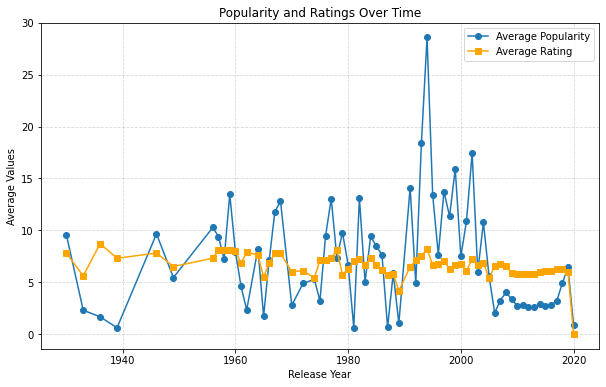

In [156]:
# Group by year and compute average popularity and rating
yearly_stats = tmdb_movies.groupby('release_year')[['popularity', 'vote_average']].mean()

plt.figure(figsize=(10, 6))
plt.plot(yearly_stats.index, yearly_stats['popularity'], marker='o', label='Average Popularity')
plt.plot(yearly_stats.index, yearly_stats['vote_average'], marker='s', label='Average Rating', color='orange')

plt.title('Popularity and Ratings Over Time')
plt.xlabel('Release Year')
plt.ylabel('Average Values')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


### How does the movie budget impact box office revenue, and can smaller budget films be profitable?

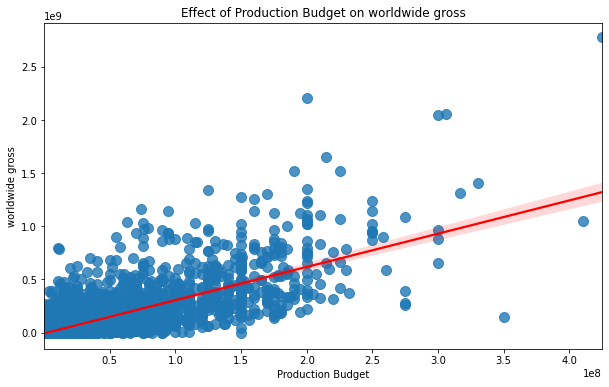

In [157]:
# How does the movie budget impact box office revenue, and can smaller budget films be profitable?
# Create a scatter plot with a regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='production_budget', y='worldwide_gross', data=movie_budgets, scatter_kws={'s':100}, line_kws={'color':'red'})

# Customize the plot
plt.title('Effect of Production Budget on worldwide gross')
plt.xlabel('Production Budget')
plt.ylabel('worldwide gross')

# Show the plot
plt.show()

The plot above shows an that the gross revenue from movies has generally increased from 1920 to 2020. This suggests that movies release in later years tend to earn more revenue.

# Correlation between domestic and foreign earnings

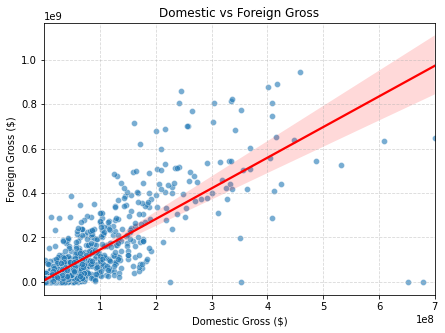

In [158]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='domestic_gross_y', y='foreign_gross', data=df_box, alpha=0.6)
sns.regplot(x='domestic_gross_y', y='foreign_gross', data=df_box, scatter=False, color='red')
plt.title('Domestic vs Foreign Gross')
plt.xlabel('Domestic Gross ($)')
plt.ylabel('Foreign Gross ($)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


# Paired t-Test

In [159]:
from scipy.stats import ttest_rel

t_stat, p_val = ttest_rel(df_box['domestic_gross_y'], df_box['foreign_gross'])
print("t-statistic:", t_stat)
print("p-value:", p_val)

print("                     ")
alpha = 0.05
if p_val < alpha:
    print("Reject the null hypothesis: Significant difference between domestic and foreign gross.")
else:
    print("Fail to reject the null hypothesis: No significant difference between domestic and foreign gross.")
    

t-statistic: -11.140101418127543
p-value: 1.5303734138825373e-27
                     
Reject the null hypothesis: Significant difference between domestic and foreign gross.


# ANOVA (One-Way)
Do different studios have significantly different average profits?

In [160]:
from scipy.stats import f_oneway

# Select top 5 studios by number of movies
top_studios = df_box['studio'].value_counts().head(5).index
profits_by_studio = [df_box[df_box['studio']==studio]['profit'] for studio in top_studios]

f_stat, p_val = f_oneway(*profits_by_studio)

print(f"F-statistic: {f_stat:.4f}")
print(f"p-value: {p_val:.4f}")

print("             ")
alpha = 0.05
if p_val < alpha:
    print("Reject Null Hypothesis (H₀): There is a significant difference in average profits among the studio")
else:
    print("Fail to Reject Null Hypothesis (H₀): There is no significant difference in average profits among the studios.")


F-statistic: 0.9881
p-value: 0.4136
             
Fail to Reject Null Hypothesis (H₀): There is no significant difference in average profits among the studios.


# Correlation heatmap
This shows how numeric features relate to each other

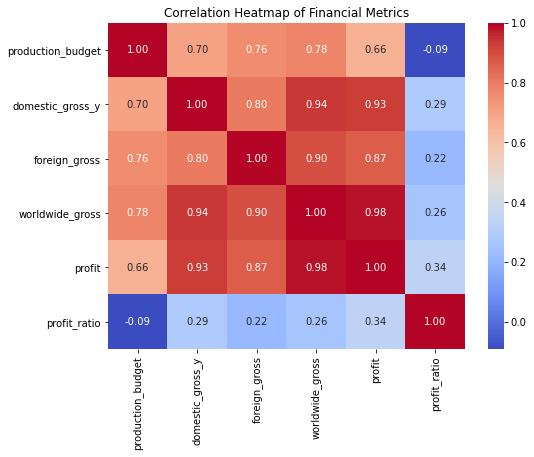

In [161]:
plt.figure(figsize=(8,6))
numeric_cols = ['production_budget', 'domestic_gross_y', 'foreign_gross', 'worldwide_gross', 'profit', 'profit_ratio']
sns.heatmap(df_box[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Financial Metrics')
plt.show()


## Hypothesis testing: High vs Low Budget Movie Profitability

**Null Hypothesis (H₀)**: High-budget and low-budget movies have the same average profit ratio.

**Alternative Hypothesis (H₁)**: High-budget and low-budget movies have different average profit ratios.

**Test**: Independent two-sample t-test

In [162]:
from scipy.stats import ttest_ind

# Define high and low budget categories (median split)
median_budget = df_box['production_budget'].median()
df_box['budget_category'] = df_box['production_budget'].apply(
    lambda x: 'High' if x >= median_budget else 'Low'
)

high_budget_ratio = df_box[df_box['budget_category'] == 'High']['profit_ratio']
low_budget_ratio = df_box[df_box['budget_category'] == 'Low']['profit_ratio']

# Conduct independent t-test
t_stat, p_val = ttest_ind(high_budget_ratio, low_budget_ratio)


print("HYPOTHESIS TEST: High vs Low Budget Movie Profitability")
print(" ")
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_val:.4f}")
print("\nNull Hypothesis (H₀): There is no difference in profit ratios between high- and low-budget movies.")
print("Alternative Hypothesis (H₁): There is a significant difference in profit ratios between high- and low-budget movies.")


HYPOTHESIS TEST: High vs Low Budget Movie Profitability
 
t-statistic: -6.0565
p-value: 0.0000

Null Hypothesis (H₀): There is no difference in profit ratios between high- and low-budget movies.
Alternative Hypothesis (H₁): There is a significant difference in profit ratios between high- and low-budget movies.


In [164]:
# changing datasets to csv
tmdb_movies.to_csv('./Cleaned Data/tmdb_movies_cleaned.csv', index=False)
movie_budgets.to_csv('./Cleaned Data/movie_budgets_cleaned.csv', index=False) 
movie_gross.to_csv('./Cleaned Data/movie_gross_cleaned.csv', index=False)
movie_basics_ratings.to_csv('./Cleaned Data/movie_basics_ratings_cleaned.csv', index=False)
df_box.to_csv('./Cleaned Data/box_office_combined_cleaned.csv', index=False)